# Hierarchical Clustering

## Importing the libraries

In [43]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

## Importing the dataset

In [64]:
dataset = pd.read_csv('Mall_customers.csv')
dataset.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [65]:
X = dataset.iloc[:, [3, 4]].values
X.shape

(200, 2)

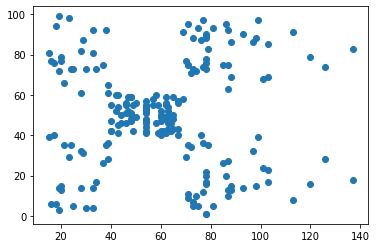

In [66]:
plt.scatter(X[:,0],X[:,1])

### Single Linkage

In [67]:
clusters=[]
l=len(X)
clusters.append([[i] for i in range(l)])

In [68]:
least=2000000000
while(len(clusters[len(clusters)-1])>=2):
    t=len(clusters)
    l=len(clusters[t-1])
    least=200000
    for i in range(l):
        for j in range(i+1,l):
            c1=clusters[t-1][i]
            c2=clusters[t-1][j]
            local=np.square((X[c1[0]]-X[c2[0]])).sum()
            for m in range(len(c1)):
                for n in range(len(c2)):
                    if np.square((X[c1[m]]-X[c2[n]])).sum()<local:
                        local=np.square(X[c1[m]]-X[c2[n]]).sum()
           # print(local,least)
            if(local<least):
                least=local
                ls=[i,j]
    new=[[s for s in p] for p in clusters[t-1]]
    clusters.append(new)
    clusters[t][ls[0]].extend(clusters[t][ls[1]])
    clusters[t].pop(ls[1])                                        
print(least,ls)

221 [0, 1]


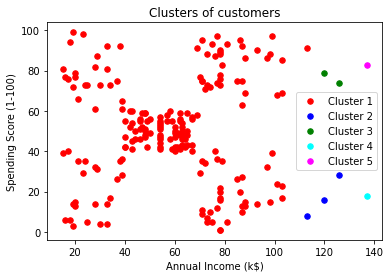

In [69]:
plt.scatter(X[clusters[195][0],0], X[clusters[195][0],1], s = 30, c = 'red', label = 'Cluster 1')
plt.scatter(X[clusters[195][1],0], X[clusters[195][1],1], s = 30, c = 'blue', label = 'Cluster 2')
plt.scatter(X[clusters[195][2],0], X[clusters[195][2],1], s = 30, c = 'green', label = 'Cluster 3')
plt.scatter(X[clusters[195][3],0], X[clusters[195][3],1], s = 30, c = 'cyan', label = 'Cluster 4')
plt.scatter(X[clusters[195][4],0], X[clusters[195][4],1], s = 30, c = 'magenta', label = 'Cluster 5')
plt.title('Clusters of customers')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend()
plt.show()

### Using built in functions

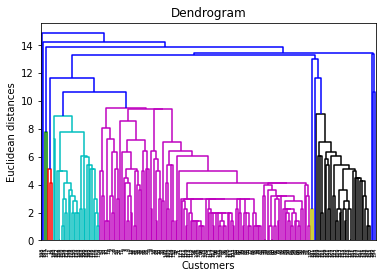

In [70]:
import scipy.cluster.hierarchy as sch
dendrogram = sch.dendrogram(sch.linkage(X, method = 'single'))
plt.title('Dendrogram')
plt.xlabel('Customers')
plt.ylabel('Euclidean distances')
plt.show()

In [71]:
from sklearn.cluster import AgglomerativeClustering
hc = AgglomerativeClustering(n_clusters = 5, affinity = 'euclidean', linkage = 'single')
y_hc = hc.fit_predict(X)

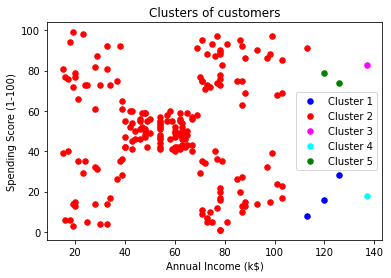

In [72]:
plt.scatter(X[y_hc == 0, 0], X[y_hc == 0, 1], s = 30, c = 'blue', label = 'Cluster 1')
plt.scatter(X[y_hc == 1, 0], X[y_hc == 1, 1], s = 30, c = 'red', label = 'Cluster 2')
plt.scatter(X[y_hc == 2, 0], X[y_hc == 2, 1], s = 30, c = 'magenta', label = 'Cluster 3')
plt.scatter(X[y_hc == 3, 0], X[y_hc == 3, 1], s = 30, c = 'cyan', label = 'Cluster 4')
plt.scatter(X[y_hc == 4, 0], X[y_hc == 4, 1], s = 30, c = 'green', label = 'Cluster 5')
plt.title('Clusters of customers')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend()
plt.show()

### Complete Linkage

In [73]:
clusters=[]
l=len(X)
clusters.append([[i] for i in range(l)])

In [74]:
least=2000000000
while(len(clusters[len(clusters)-1])>=2):
    t=len(clusters)
    l=len(clusters[t-1])
    least=200000000
    for i in range(l):
        for j in range(i+1,l):
            c1=clusters[t-1][i]
            c2=clusters[t-1][j]
            local=np.square((X[c1[0]]-X[c2[0]])).sum()
            for m in range(len(c1)):
                for n in range(len(c2)):
                    if np.square((X[c1[m]]-X[c2[n]])).sum()>local:
                        local=np.square(X[c1[m]]-X[c2[n]]).sum()
           # print(local,least)
            if(local<least):
                least=local
                ls=[i,j]
    new=[[s for s in p] for p in clusters[t-1]]
    clusters.append(new)
    clusters[t][ls[0]].extend(clusters[t][ls[1]])
    clusters[t].pop(ls[1])                                        
print(least,ls)

20570 [0, 1]


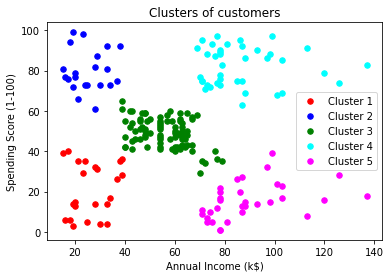

In [75]:
plt.scatter(X[clusters[195][0],0], X[clusters[195][0],1], s = 30, c = 'red', label = 'Cluster 1')
plt.scatter(X[clusters[195][1],0], X[clusters[195][1],1], s = 30, c = 'blue', label = 'Cluster 2')
plt.scatter(X[clusters[195][2],0], X[clusters[195][2],1], s = 30, c = 'green', label = 'Cluster 3')
plt.scatter(X[clusters[195][3],0], X[clusters[195][3],1], s = 30, c = 'cyan', label = 'Cluster 4')
plt.scatter(X[clusters[195][4],0], X[clusters[195][4],1], s = 30, c = 'magenta', label = 'Cluster 5')
plt.title('Clusters of customers')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend()
plt.show()

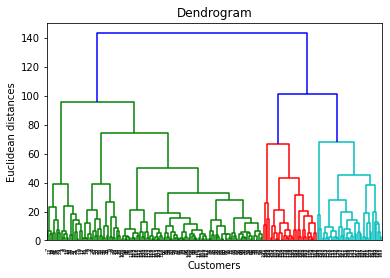

In [76]:
import scipy.cluster.hierarchy as sch
dendrogram = sch.dendrogram(sch.linkage(X, method = 'complete'))
plt.title('Dendrogram')
plt.xlabel('Customers')
plt.ylabel('Euclidean distances')
plt.show()

In [77]:
from sklearn.cluster import AgglomerativeClustering
hc = AgglomerativeClustering(n_clusters = 5, affinity = 'euclidean', linkage = 'complete')
y_hc = hc.fit_predict(x)

ValueError: Expected 2D array, got 1D array instead:
array=[5.1 4.9 4.7 4.6 5.  5.4 4.6 5.  4.4 4.9 5.4 4.8 4.8 4.3 5.8 5.7 5.4 5.1
 5.7 5.1 5.4 5.1 4.6 5.1 4.8 5.  5.  5.2 5.2 4.7 4.8 5.4 5.2 5.5 4.9 5.
 5.5 4.9 4.4 5.1 5.  4.5 4.4 5.  5.1 4.8 5.1 4.6 5.3 5.  7.  6.4 6.9 5.5
 6.5 5.7 6.3 4.9 6.6 5.2 5.  5.9 6.  6.1 5.6 6.7 5.6 5.8 6.2 5.6 5.9 6.1
 6.3 6.1 6.4 6.6 6.8 6.7 6.  5.7 5.5 5.5 5.8 6.  5.4 6.  6.7 6.3 5.6 5.5
 5.5 6.1 5.8 5.  5.6 5.7 5.7 6.2 5.1 5.7 6.3 5.8 7.1 6.3 6.5 7.6 4.9 7.3
 6.7 7.2 6.5 6.4 6.8 5.7 5.8 6.4 6.5 7.7 7.7 6.  6.9 5.6 7.7 6.3 6.7 7.2
 6.2 6.1 6.4 7.2 7.4 7.9 6.4 6.3 6.1 7.7 6.3 6.4 6.  6.9 6.7 6.9 5.8 6.8
 6.7 6.7 6.3 6.5 6.2 5.9].
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.

In [ ]:
plt.scatter(X[y_hc == 0, 0], X[y_hc == 0, 1], s = 30, c = 'cyan', label = 'Cluster 1')
plt.scatter(X[y_hc == 1, 0], X[y_hc == 1, 1], s = 30, c = 'green', label = 'Cluster 2')
plt.scatter(X[y_hc == 2, 0], X[y_hc == 2, 1], s = 30, c = 'magenta', label = 'Cluster 3')
plt.scatter(X[y_hc == 3, 0], X[y_hc == 3, 1], s = 30, c = 'blue', label = 'Cluster 4')
plt.scatter(X[y_hc == 4, 0], X[y_hc == 4, 1], s = 30, c = 'red', label = 'Cluster 5')
plt.title('Clusters of customers')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend()
plt.show()

### Ward Linkage

In [4]:
np.random.randint(15)

12

### Iris Data

In [44]:
from sklearn import datasets
from sklearn.decomposition import PCA
import numpy as np 
import pandas as pd

iris = datasets.load_iris()

In [45]:
X=iris['data']
X.shape

(150, 4)

In [46]:
X = PCA(n_components=2).fit_transform(X)

In [47]:
Y= iris.target
Y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

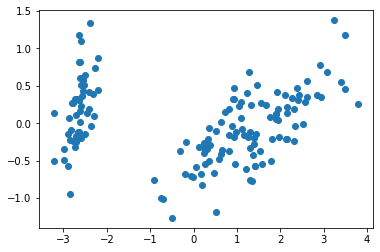

In [48]:
plt.scatter(X[:,0],X[:,1])

In [49]:
from sklearn.cluster import AgglomerativeClustering
clustering = AgglomerativeClustering(n_clusters = 3, affinity = 'euclidean', linkage = 'complete')
clusters = clustering.fit_predict(X)

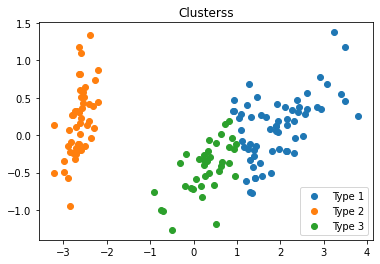

In [50]:
plt.scatter(X[clusters == 0, 0], X[clusters == 0, 1],label = 'Type 1')
plt.scatter(X[clusters == 1, 0], X[clusters == 1, 1],label = 'Type 2')
plt.scatter(X[clusters == 2, 0], X[clusters == 2, 1],label = 'Type 3')

plt.title('Clusterss')
plt.legend()
plt.show()

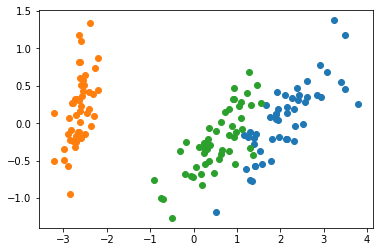

In [54]:
plt.scatter(X[Y == 2, 0], X[Y == 2, 1],label = 'Cluster 3')
plt.scatter(X[Y == 0, 0], X[Y == 0, 1],label = 'Cluster 1')
plt.scatter(X[Y == 1, 0], X[Y == 1, 1],label = 'Cluster 2')


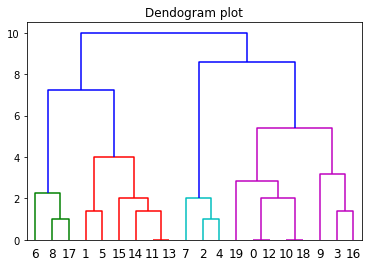

In [120]:
x=np.random.randint(10,size=(20,2))

plt.title('Dendogram plot') 
import scipy.cluster.hierarchy as s 
dendo= s.dendrogram((s.linkage(x, method ='complete')))

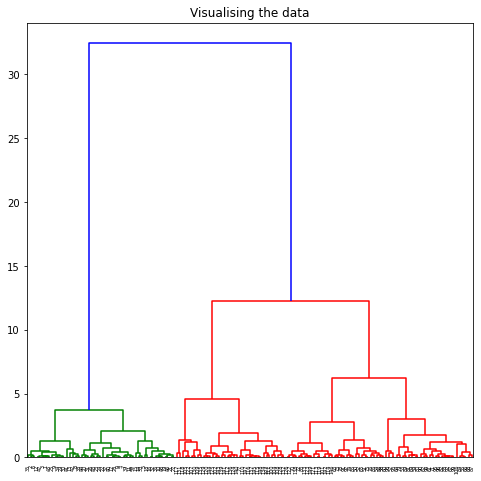

In [103]:
plt.figure(figsize =(8, 8)) 
plt.title('Visualising the data') 
import scipy.cluster.hierarchy as shc 
Dendrogram = shc.dendrogram((shc.linkage(X, method ='ward')))

In [136]:
X.shape

(150, 4)

In [178]:



from sklearn.manifold import TSNE

X1 = TSNE(n_components=2).fit_transform(X)



In [179]:
X1.shape

(569, 2)

In [180]:
from collections import Counter
Counter(Y)

Counter({0: 212, 1: 357})

In [8]:
from sklearn import datasets
from sklearn.decomposition import PCA
import numpy as np 
import pandas as pd

d = datasets.load_breast_cancer()

In [36]:
X=d['data']
Y=d['target']

In [16]:
from matplotlib import pyplot as plt

In [10]:
from collections import Counter
Counter(Y)

Counter({0: 212, 1: 357})

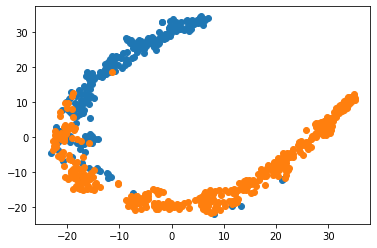

In [38]:
for i in range(2):
    plt.scatter(X[Y==i,0],X[Y==i,1])